# Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    NearestNeighbors
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score
)
from tpot import TPOTClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [2]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    check_balance_classification,
    classification_rate_by_group,
    over_under_sampling_classification,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    validate_test_data_categorical_columns,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    get_cross_validator,
    grid_search_classifier,
    random_search_classifier,
    get_classifier,
    get_x_y,
    plot_feature_importance,
    Check_Overfitting_Classification,
    plot_confusion_matrix,
    evaluate_model_Classification,
)

# call_visualization_def

In [3]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [4]:
df = read_data(r'customer_churn_dataset-testing-master.csv')
true_original_df = copy.deepcopy(df)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from customer_churn_dataset-testing-master.csv


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
# Make the target is last column
df = target_last_col(df,'Churn')

# Get Information of Data

In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [7]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,CustomerID,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",64374,64374,0
1,Age,int64,"[22, 41, 47, 35, 53, 30, 54, 36, 65, 46, 56, 3...",48,64374,0
2,Gender,object,"[Female, Male]",2,64374,0
3,Tenure,int64,"[25, 28, 27, 9, 58, 41, 37, 36, 20, 8, 42, 13,...",60,64374,0
4,Usage Frequency,int64,"[14, 28, 10, 12, 24, 15, 11, 5, 4, 27, 23, 7, ...",30,64374,0
5,Support Calls,int64,"[4, 7, 2, 5, 9, 10, 0, 6, 1, 3, 8]",11,64374,0
6,Payment Delay,int64,"[27, 13, 29, 17, 2, 10, 28, 18, 8, 23, 21, 14,...",31,64374,0
7,Subscription Type,object,"[Basic, Standard, Premium]",3,64374,0
8,Contract Length,object,"[Monthly, Annual, Quarterly]",3,64374,0
9,Total Spend,int64,"[598, 584, 757, 232, 533, 500, 574, 323, 687, ...",901,64374,0


# drop not useful columns

#### list of columns

In [8]:
not_useful_columns_name = ['CustomerID']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [9]:
# not_useful_columns(df=df, column_name='')

# change the dtype of the column from object to numeric

#### list of columns

In [10]:
# convert_to_numeric_columns_name = ['']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [11]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [12]:
original_df = copy.deepcopy(df)
original_df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


# Describe numerical column and his information

In [13]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [14]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# Describe object column and his information

In [15]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['Gender', 'Subscription Type', 'Contract Length']

In [16]:
df.describe(include=['object'])

,Gender,Subscription Type,Contract Length
count,64374,64374,64374
unique,2,3,3
top,Female,Standard,Monthly
freq,34353,21502,22130


# Data Encoding columns with 2 unique values

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
columns_with_2_unique_values = [col for col in object_columns if len(df[col].value_counts()) == 2]

df = encode_column(df, columns = columns_with_2_unique_values, method='binary')

In [18]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,1,25,14,4,27,Basic,Monthly,598,9,1
1,41,1,28,28,7,13,Standard,Monthly,584,20,0
2,47,0,27,10,2,29,Premium,Annual,757,21,0
3,35,0,9,12,5,17,Premium,Quarterly,232,18,0
4,53,1,58,24,9,2,Standard,Annual,533,18,0


# check columns have nulls

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  int64 
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 5.4+ MB


In [20]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

## Identify columns with missing values

In [21]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [22]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [23]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [24]:
# remove_missing_rows(df=df)

## check columns with missing values

In [25]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [26]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [27]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [28]:
# df = fill_missing_values_column(df, columns='', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [29]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [30]:
outliers_df = check_outliers(df)

Age                     0
Gender                  0
Tenure                  0
Usage Frequency         0
Support Calls           0
Payment Delay           0
Total Spend         64374
Last Interaction        0
Churn                   0
dtype: int64


## check outliers (plots)

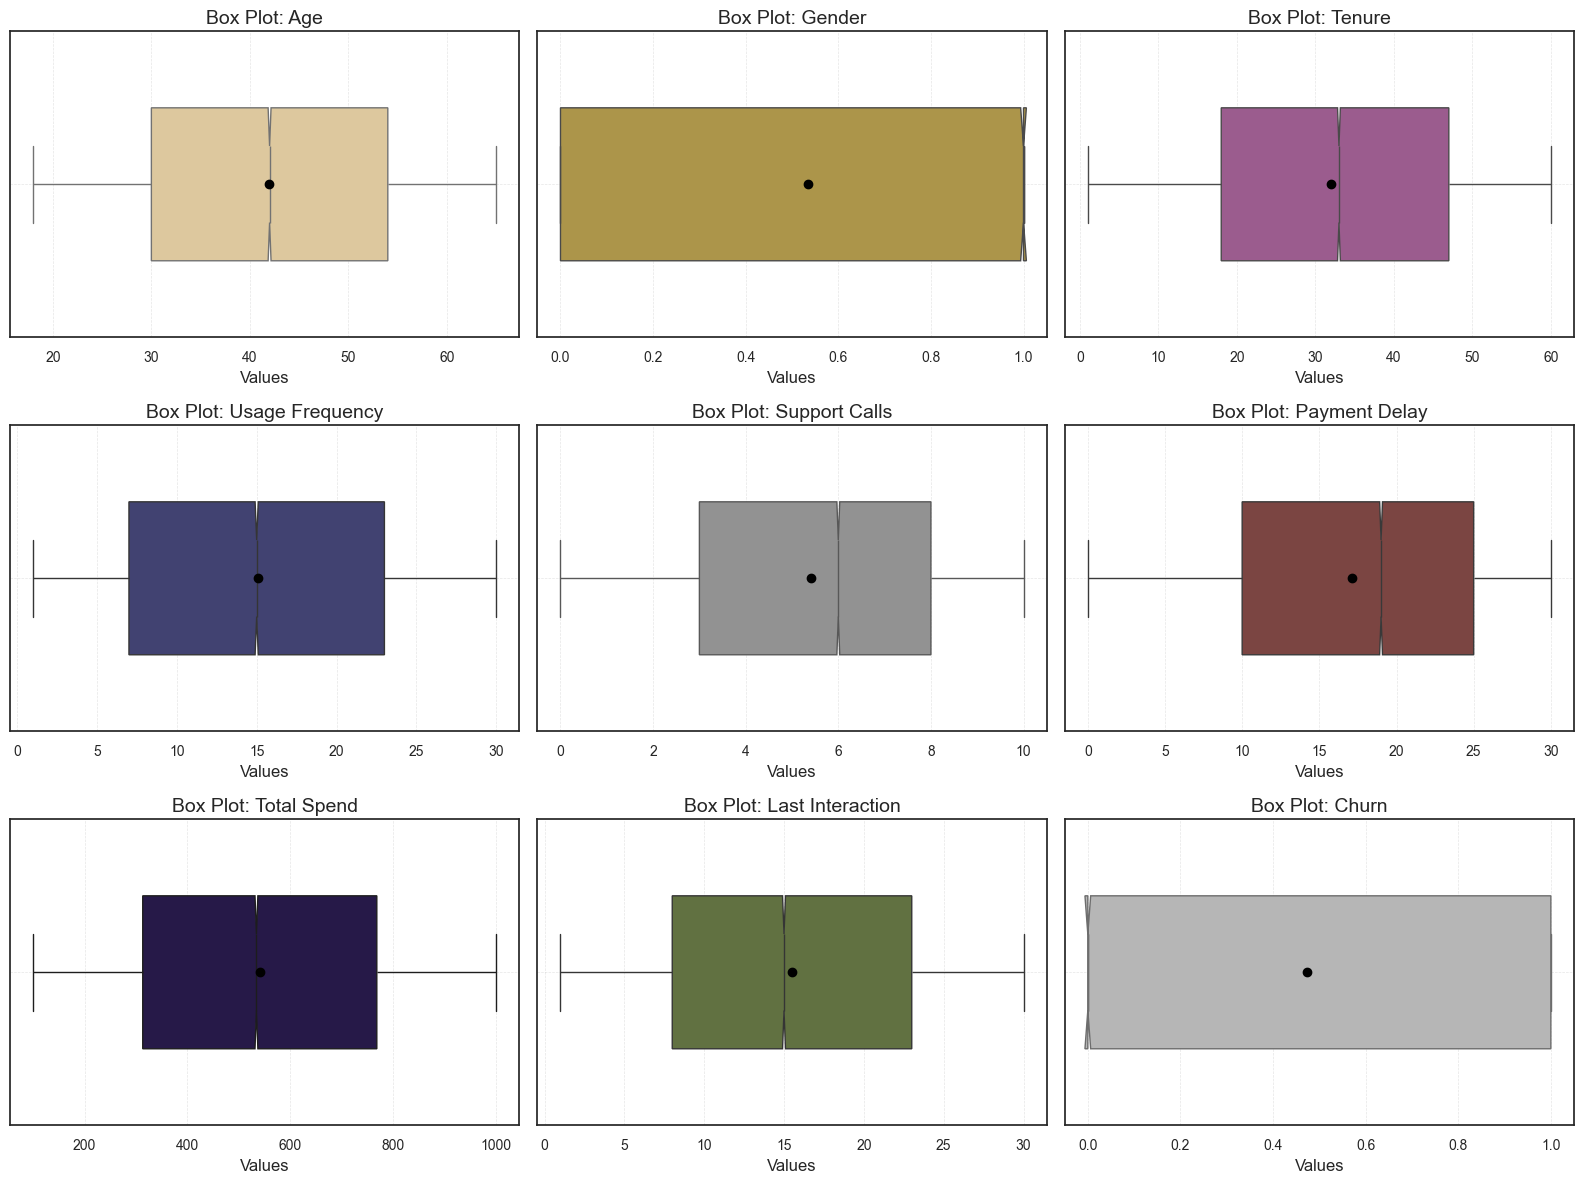

In [31]:
box_plot_all_columns(df, subplot_row = 3)

# Check the unbalance data

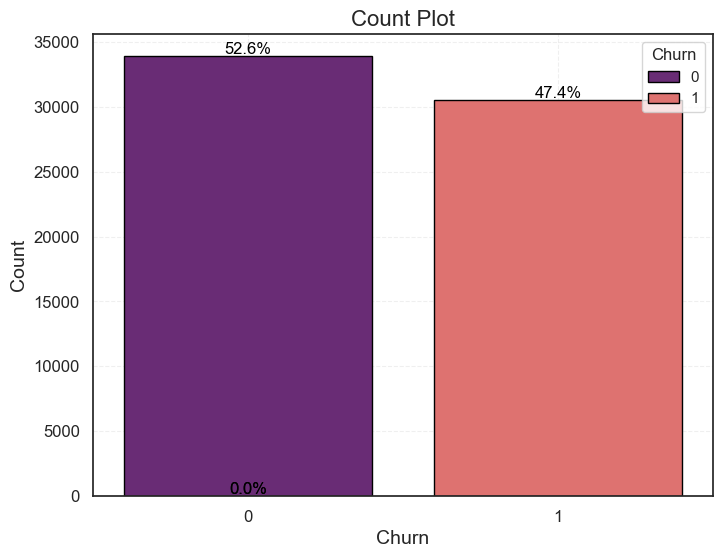

,count
name,
0,33881
1,30493


In [32]:
check_balance_classification(df,column_plot='Churn')

# Visualization

## info from the data

In [ ]:
age_churn_rates = classification_rate_by_group(true_original_df, 'Age', 'Churn', 'CustomerID', positive_class=1)
age_churn_rates

## chart

In [33]:
PaymentMethod_name = df['Contract Length'].value_counts().index.to_list()
PaymentMethod_values = df['Contract Length'].value_counts().values.tolist()
# pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Contract Length")


In [34]:
InternetService_name = df['Subscription Type'].value_counts().index.to_list()
InternetService_values = df['Subscription Type'].value_counts().values.tolist()
# pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Subscription Type")

In [35]:
Contract_name = original_df['Gender'].value_counts().index.to_list()
Contract_values = original_df['Gender'].value_counts().values.tolist()
# pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Gender")

## Multiple bar

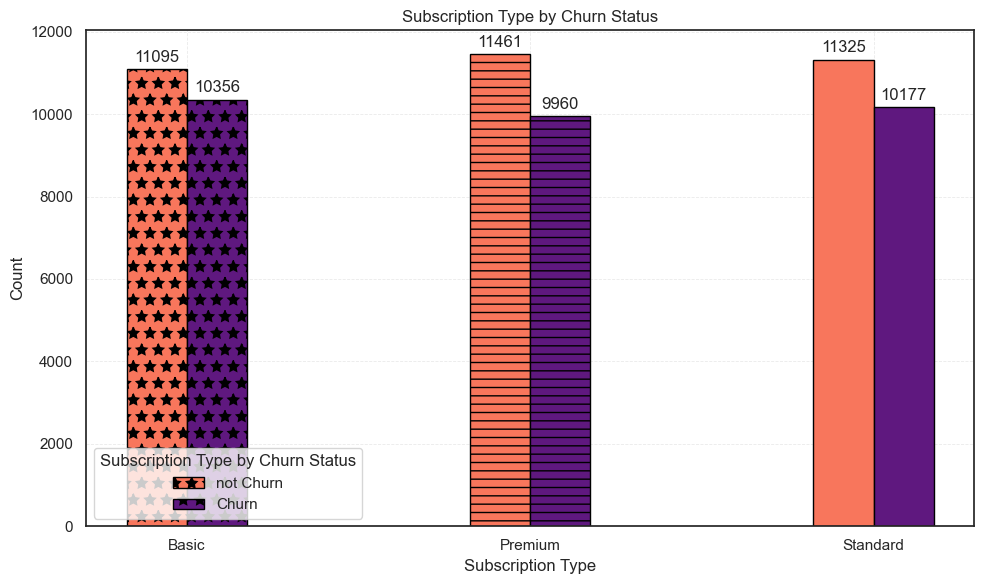

In [36]:
grouped_data = original_df.groupby(['Subscription Type', 'Churn']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Churn', 'Churn']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Subscription Type by Churn Status', xlabel='Subscription Type', ylabel='Count')

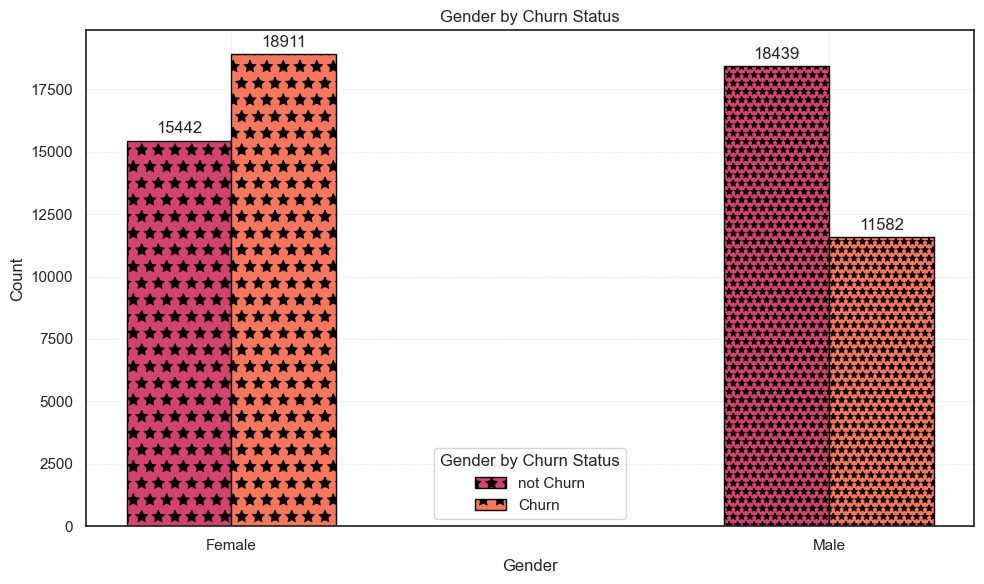

In [37]:
grouped_data = original_df.groupby(['Gender', 'Churn']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Churn', 'Churn']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Gender by Churn Status', xlabel='Gender', ylabel='Count')

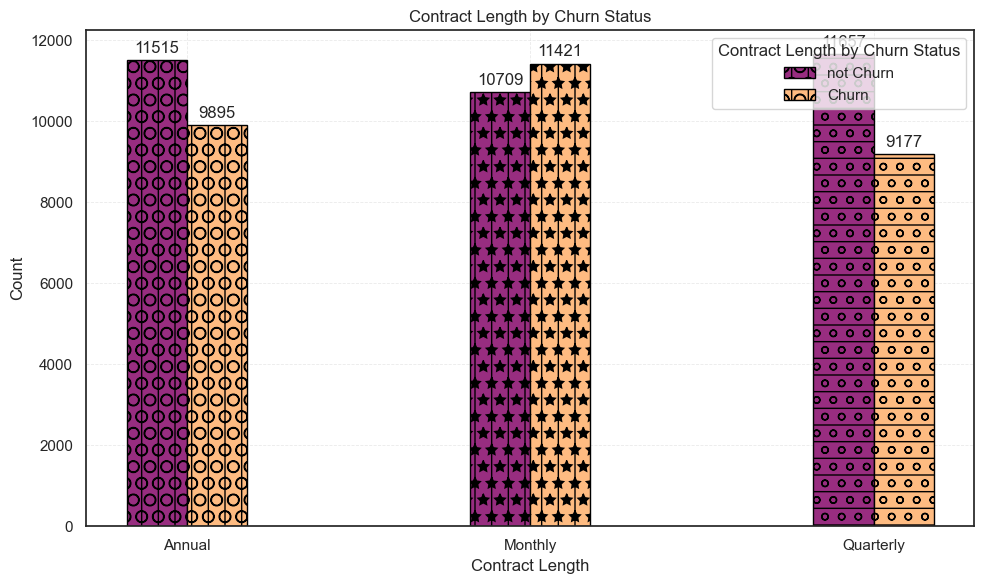

In [38]:
grouped_data = original_df.groupby(['Contract Length', 'Churn']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Churn', 'Churn']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Contract Length by Churn Status', xlabel='Contract Length', ylabel='Count')

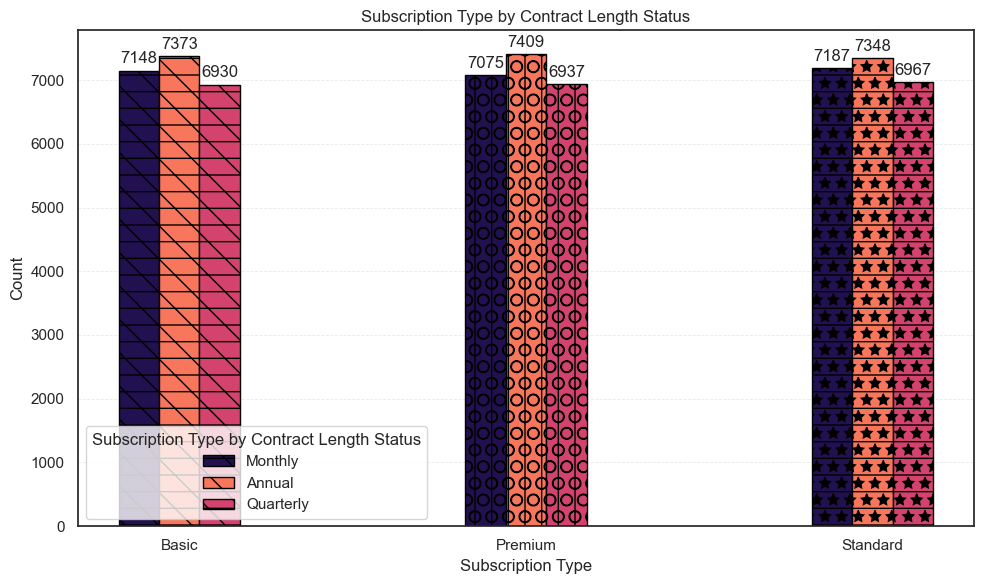

In [39]:
grouped_data = original_df.groupby(['Subscription Type', 'Contract Length']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Monthly', 'Annual', 'Quarterly']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Subscription Type by Contract Length Status', xlabel='Subscription Type', ylabel='Count')

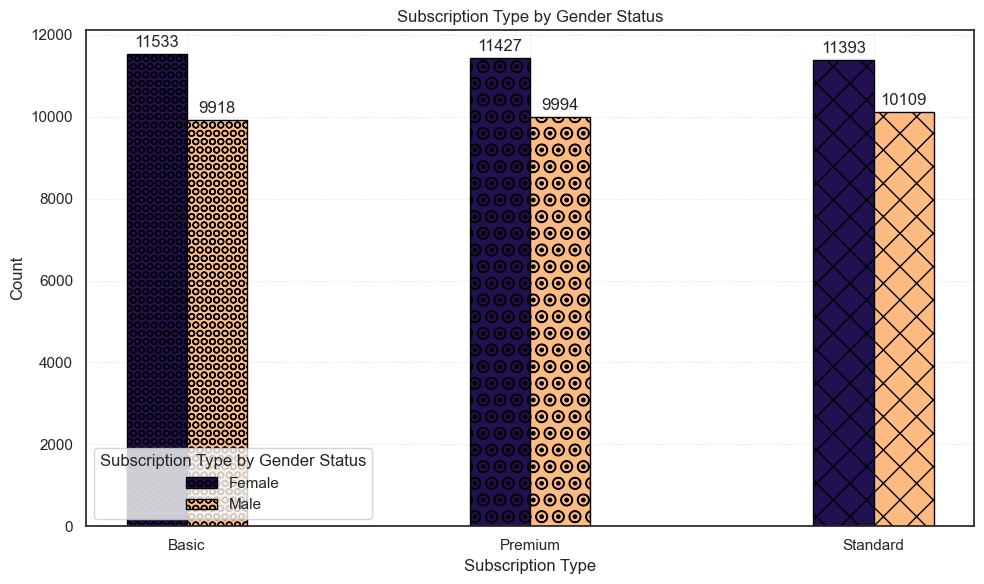

In [40]:
grouped_data = original_df.groupby(['Subscription Type', 'Gender']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Female', 'Male']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Subscription Type by Gender Status', xlabel='Subscription Type', ylabel='Count')

## Bar

In [41]:
column_counts = original_df['Tenure'].value_counts().reset_index()
column_counts.columns = ['tenure', 'value']

bar_plot_plotly(df=column_counts, x='tenure', y='value', hue='value')

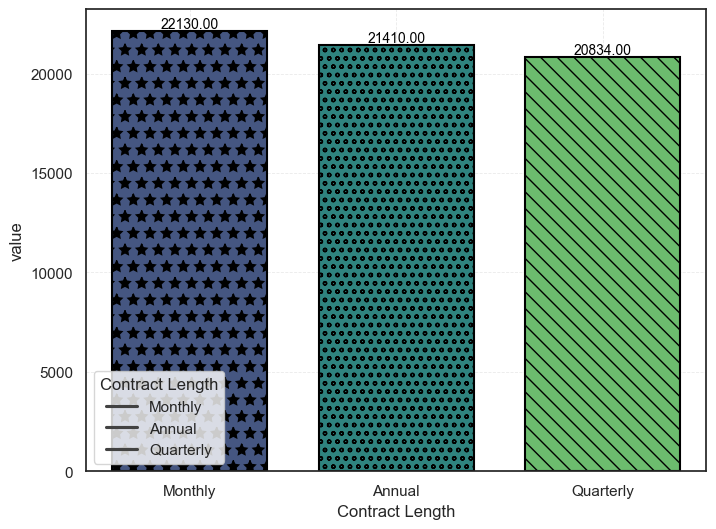

In [42]:
column_counts = original_df['Contract Length'].value_counts().reset_index()
column_counts.columns = ['Contract Length', 'value']

bar_plot_seaborn(df=column_counts, x='Contract Length', y='value',palette='viridis')

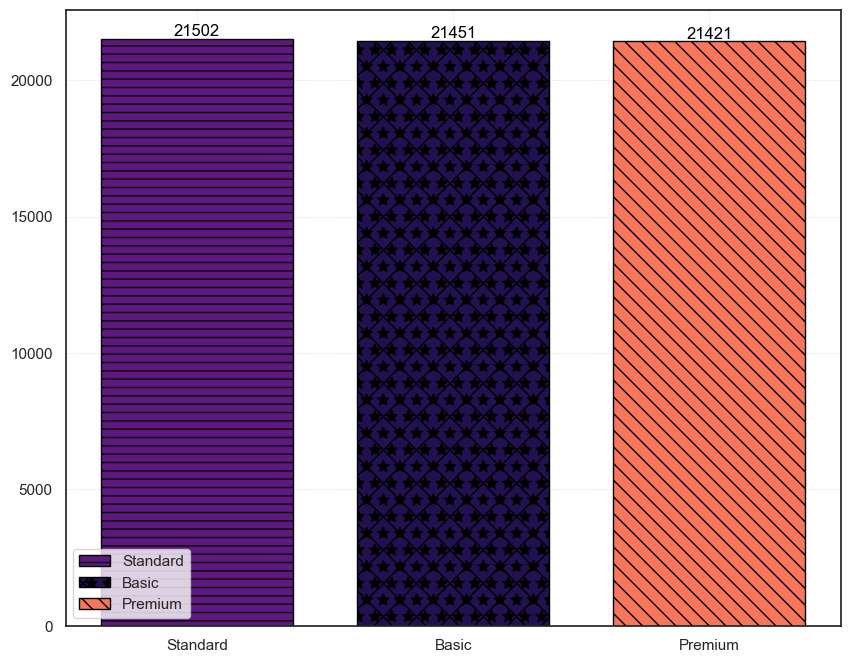

In [43]:
column_counts = original_df['Subscription Type'].value_counts().reset_index()
column_counts.columns = ['Subscription Type', 'value']

bar_plot_matplotlib(column_counts['Subscription Type'], column_counts['value'],x_rotation=0)

## count plot

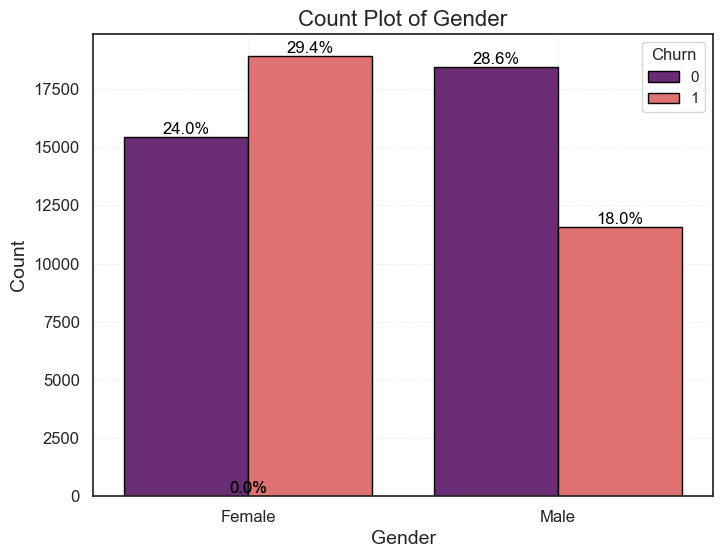

<Axes: title={'center': 'Count Plot of Gender'}, xlabel='Gender', ylabel='Count'>

In [44]:
count_plot(df=original_df , x='Gender' , hue='Churn')

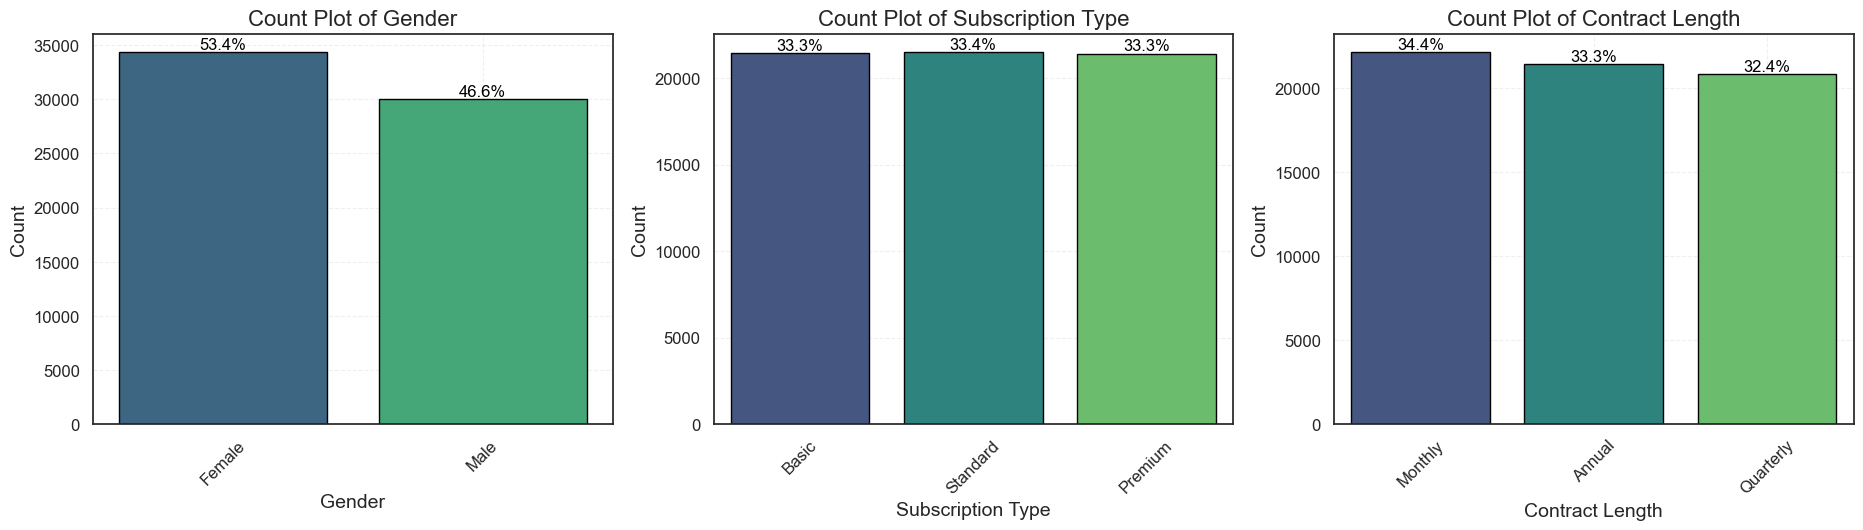

In [45]:
categorical_features=original_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

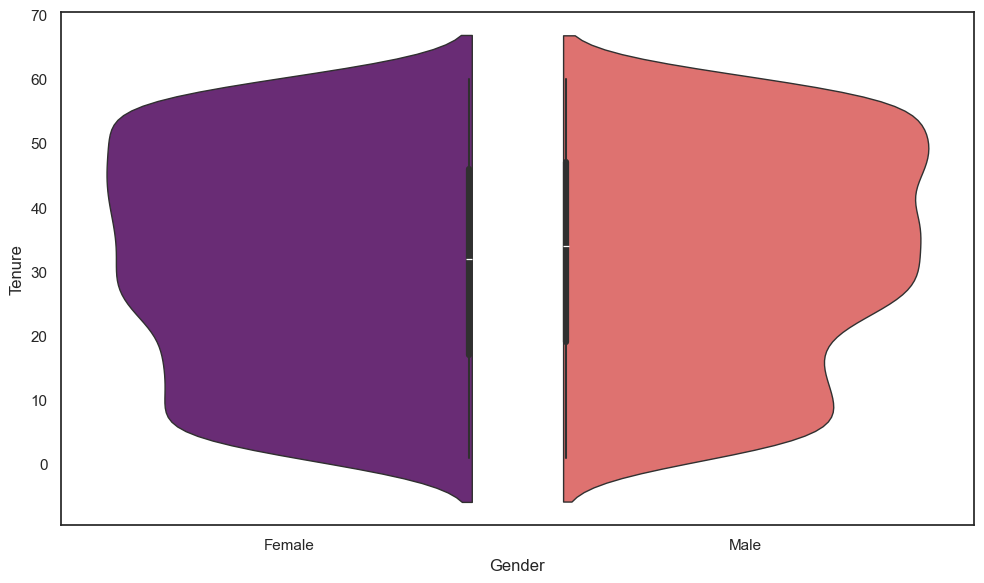

In [46]:
violin_plot(data=original_df, x='Gender', y='Tenure', hue='Gender',split=True) #catagorical column in x and numircal in y

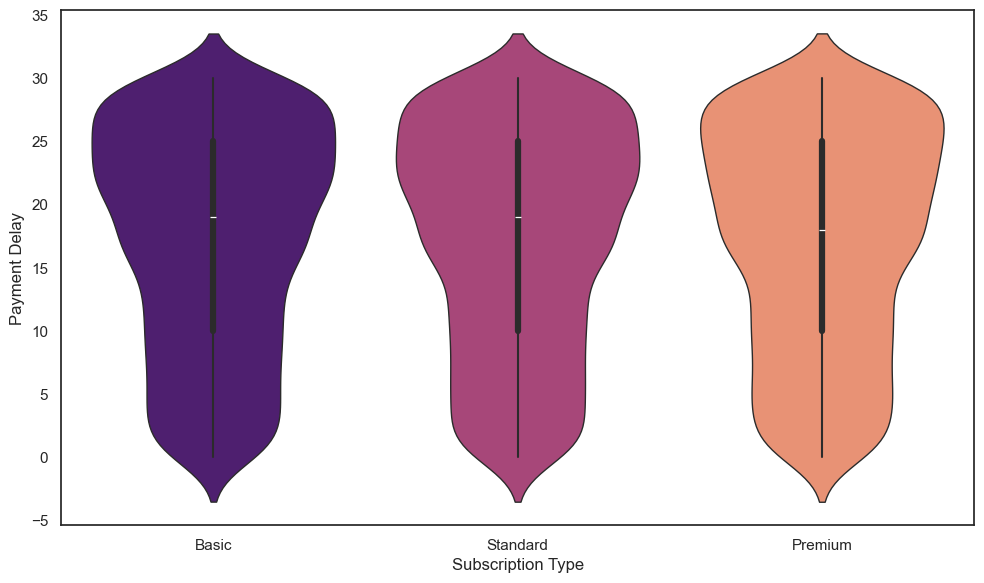

In [47]:
violin_plot(data=original_df, x='Subscription Type', y='Payment Delay', hue='Subscription Type') #catagorical column in x and numircal in y

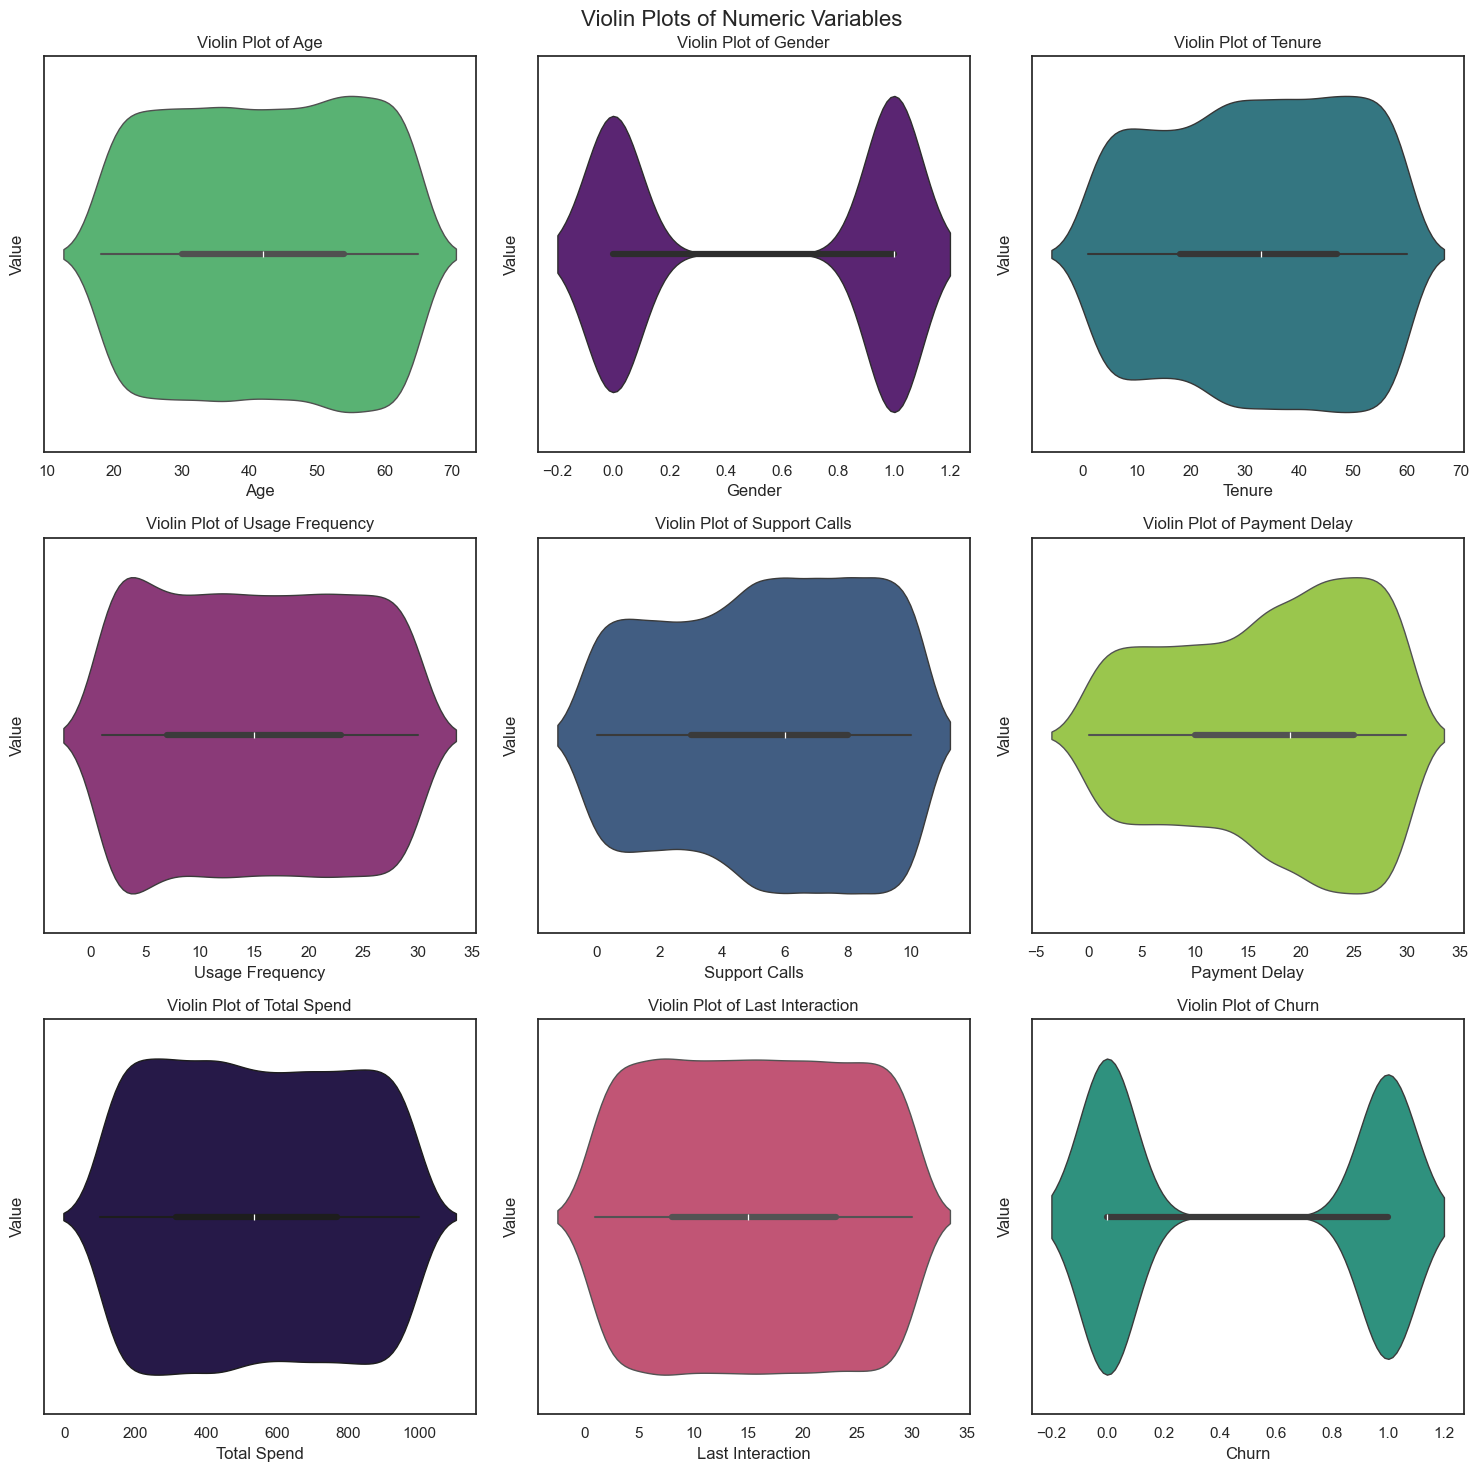

In [48]:
plot_violin_all_column(df)

## Histogram

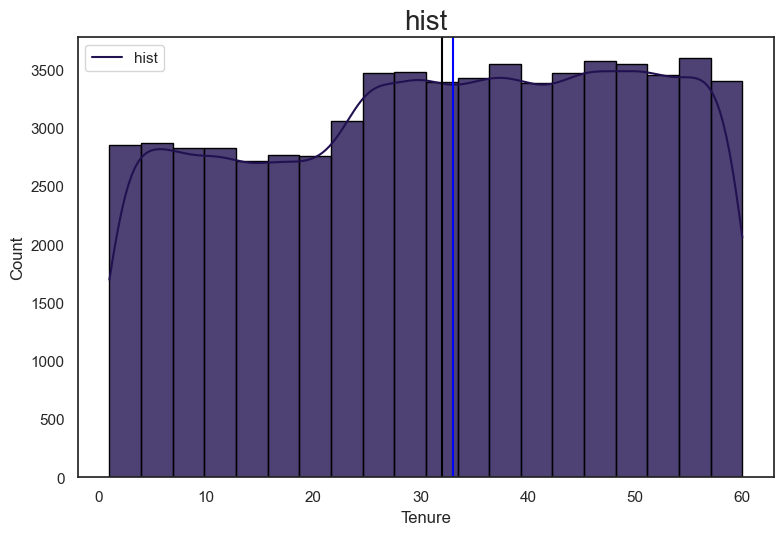

In [49]:
plot_single_histogram_seaborn(original_df,x='Tenure', bins=20, palette='magma', show=False)
plt.axvline(np.mean(original_df["Tenure"]) , color = "black" , label ="The Mean of the tenure")
plt.axvline(np.median(original_df["Tenure"]) , color = "blue" , label ="The Median of the tenure")
plt.show()

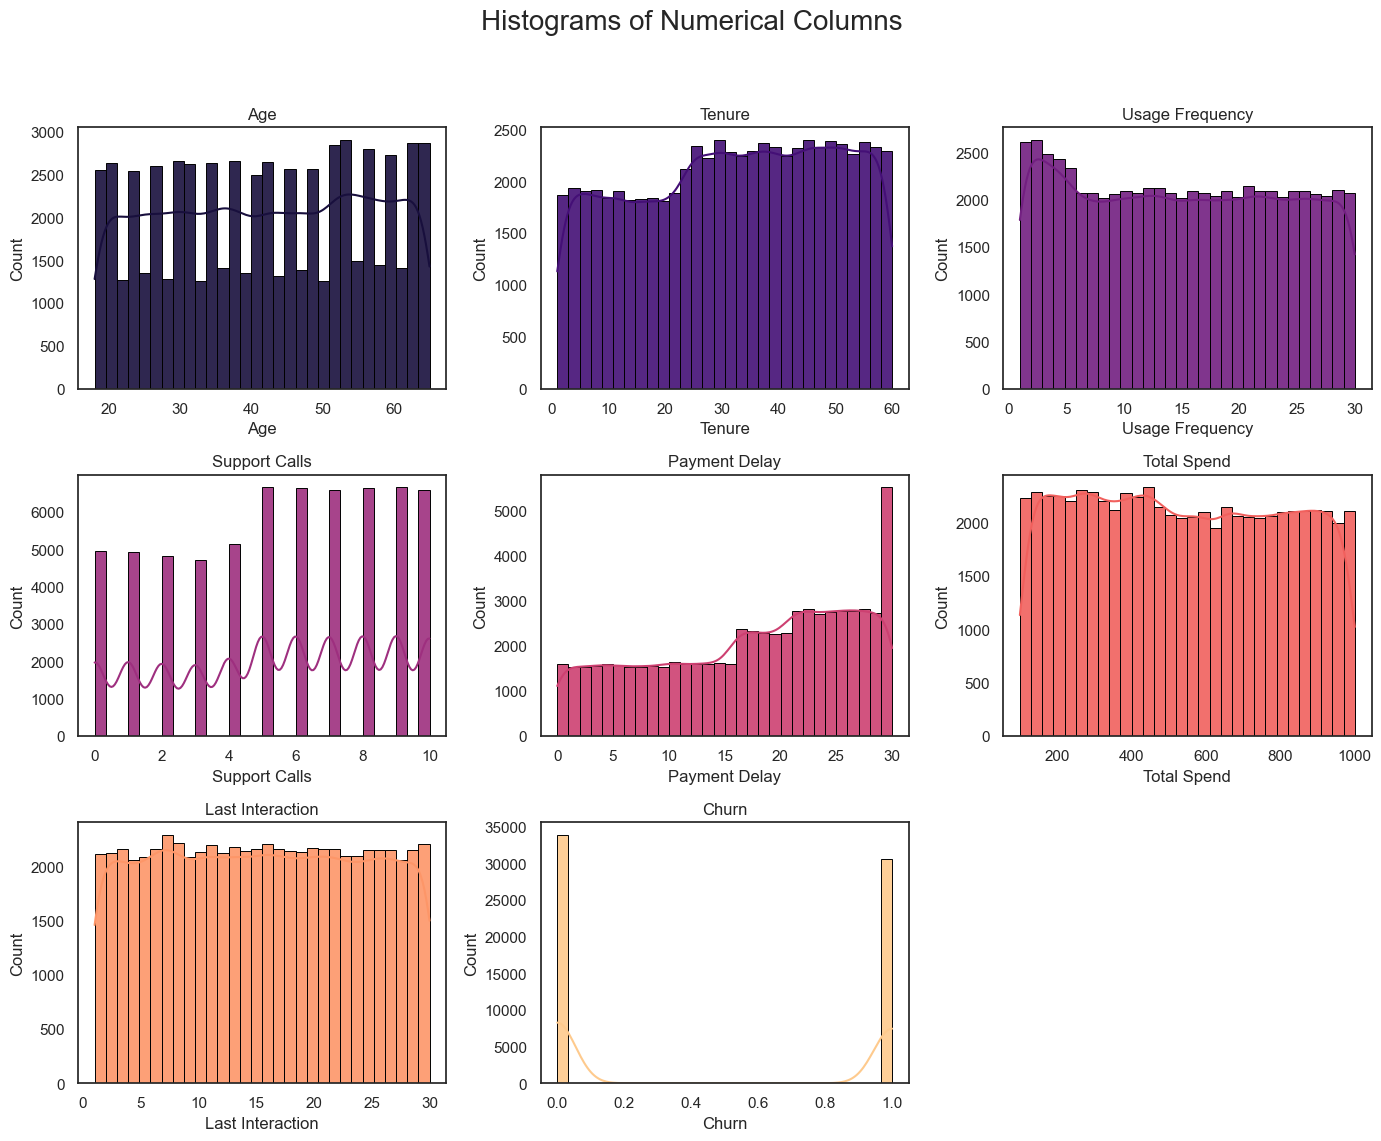

In [50]:
plot_histograms(original_df,column=None, bins=30)

# Correlation Coefficient

## Calculate Correlation

In [51]:
calculate_correlation(df, outcome_column='Churn',num_results=5)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 5 results:
          Variable  Pearson Coefficient        P-Value
5    Payment Delay             0.557386   0.000000e+00
4    Support Calls             0.304631   0.000000e+00
2           Tenure             0.195327   0.000000e+00
1           Gender             0.164549   0.000000e+00
3  Usage Frequency            -0.115098  1.048577e-188

Payment Delay
The Pearson Correlation Coefficient for Payment Delay is 0.5574 with a P-value of P = 0

Support Calls
The Pearson Correlation Coefficient for Support Calls is 0.3046 with a P-value of P = 0

Tenure
The Pearson Correlation Coefficient for Tenure is 0.1953 with a P-value of P = 0

Gender
The Pearson Correlation Coefficient for Gender is 0.1645 with a P-value of P = 0

Usage Frequency
The Pearson Correlation Coefficient for Usage Frequency is -0.1151 with a P-value of P = 1.049e-188


,Variable,Pearson Coefficient,P-Value
5,Payment Delay,0.557386,0.000000e+00
4,Support Calls,0.304631,0.000000e+00
2,Tenure,0.195327,0.000000e+00
1,Gender,0.164549,0.000000e+00
3,Usage Frequency,-0.115098,1.048577e-188


## Visualize Correlation with Bars

In [52]:
# df_corr = df.corr()['Churn'].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

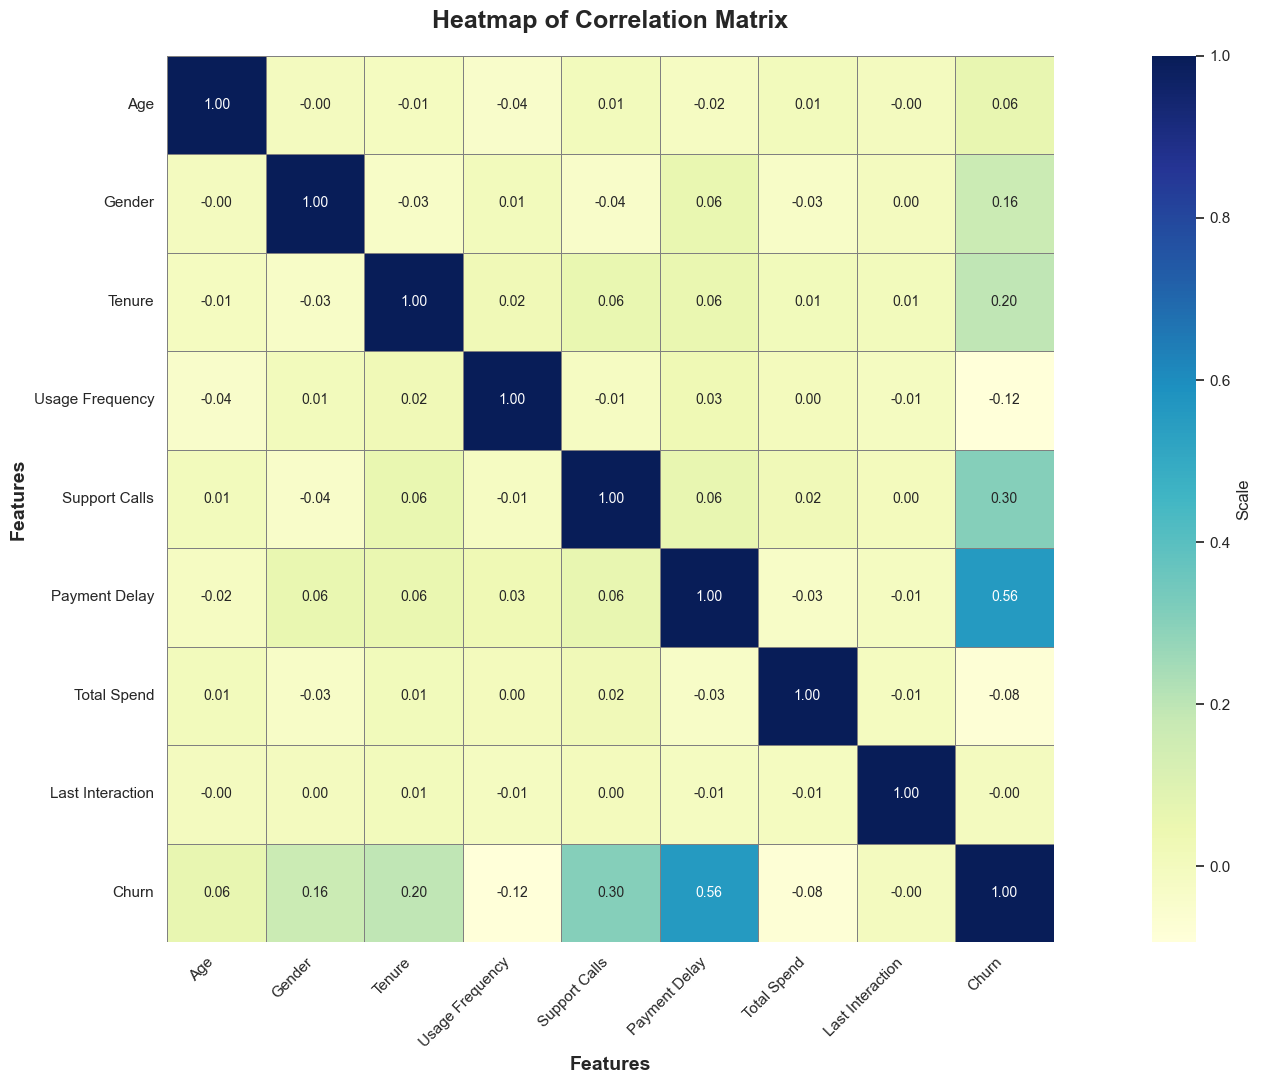

In [53]:
correlations = Heatmap_Correlation(df, mask=-1)

# Data Encoding

In [54]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['Subscription Type', 'Contract Length']

In [55]:
column = ['Subscription Type', 'Contract Length']

df = encode_column(df, columns = 'Contract Length', method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')

# df = encode_column(df, columns = '', method='target',target="")

# ordinal_categories = df['Subscription Type'].value_counts().index.to_list()
df = encode_column(df, columns = 'Subscription Type', method= 'ordinal', ordinal_categories=['Basic', 'Standard', 'Premium'])

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [56]:
len(df.columns)

12

## Make the target is last column

In [57]:
df = target_last_col(df,'Churn')
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,22,1,25,14,4,27,0.0,598,9,1.0,0.0,1
1,41,1,28,28,7,13,1.0,584,20,1.0,0.0,0
2,47,0,27,10,2,29,2.0,757,21,0.0,0.0,0
3,35,0,9,12,5,17,2.0,232,18,0.0,1.0,0
4,53,1,58,24,9,2,1.0,533,18,0.0,0.0,0


# Repair unbalanced data by using oversampling and undersampling.

In [58]:
x, y = get_x_y(df, target='Churn')

In [59]:
# the data is balanced
# df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.75, n_jobs=1)

### Check the unbalance data after repair 

In [60]:
# check_balance_classification(df,column_plot='Churn')

# Get X , Y (TVT)

In [61]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target='Churn')

In [ ]:
validate_test_data_categorical_columns(x_train, x_test, x_valid)

In [62]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (45319, 11)
x_valid shape = (6180, 11)
x_test shape = (12875, 11)
y_train shape = (45319,)
y_valid shape = (6180,)
y_test shape = (12875,)


# Get train, valid and test data in same time

In [63]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [64]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [65]:
print(len(df.columns))

12


In [66]:
x_train, x_test, x_valid, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, x_valid=x_valid, method='SelectKBest', stat_method='f_classif', k=10)
selected_mask = FS_model.get_support()

x_column_name = x
x = FS_model.transform(x)

# Get selected and dropped columns
selected_columns = x_column_name.columns[selected_mask]
dropped_columns = x_column_name.columns[~selected_mask]

# Dimensionality Reduction

In [67]:
# print(len(df.columns))

In [68]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, y_train=y_train, method= 'LDA', n_components=20)
# x = DR_model.transform(x)

# Train

In [69]:
models_names = ['XGBoost', 'RandomForest', 'SVM', 'Stacking']
models_values = []

## XGBoost_model

In [70]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [71]:
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
best_params = 0.9998676056853764


In [72]:
XGBoost_model = best_estimator
XGBoost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

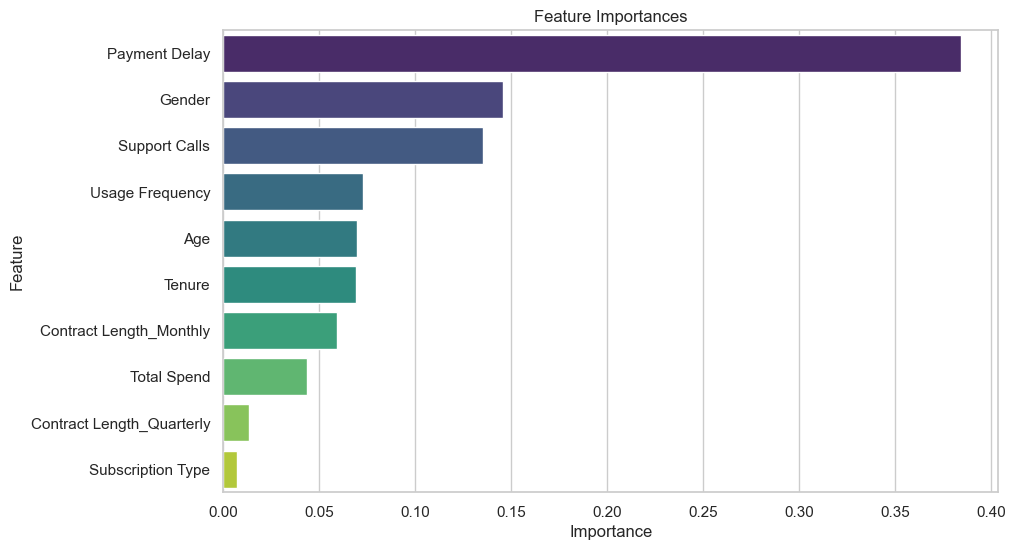

In [73]:
plot_feature_importance(XGBoost_model, x_train, selected_columns)

### Check Overfitting

Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 0.9998

Precision:
Training Precision: 1.0000
Validation Precision: 0.9998

Recall:
Training Recall: 1.0000
Validation Recall: 0.9998

F1-Score:
Training F1-Score: 1.0000
Validation F1-Score: 0.9998

MCC:
Training MCC: 0.9999
Validation MCC: 0.9997

Balanced Accuracy:
Training Balanced Accuracy: 1.0000
Validation Balanced Accuracy: 0.9998

Confusion Matrix:
Validation Confusion Matrix:
[[3302    1]
 [   0 2877]]

Cross-Validation(CV):
Cross-Validation Scores: [0.99992233 1.         0.99984466 1.         0.99992232]
Cross-Validation Mean Score: 0.9999


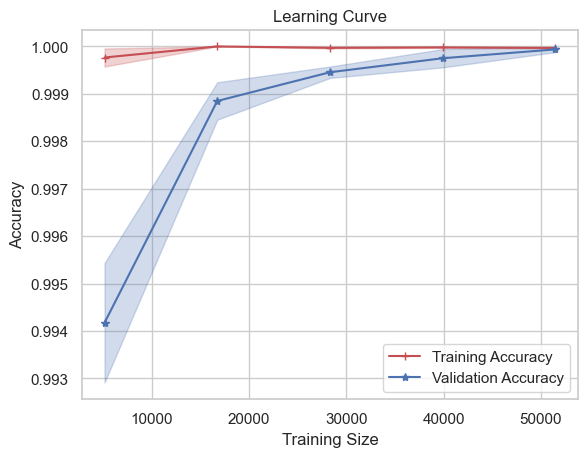

ROC AUC: 1.0000


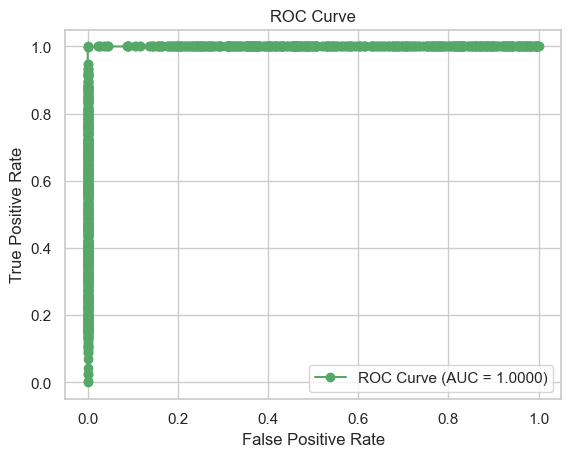

In [74]:
Check_Overfitting_Classification(XGBoost_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [75]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

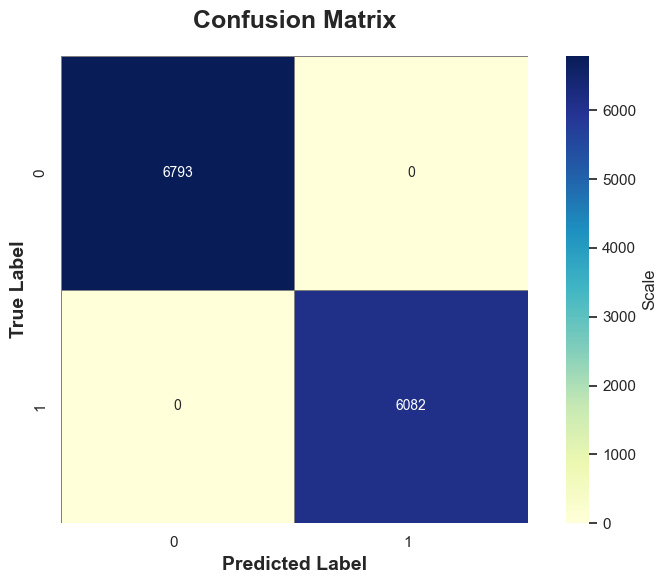

In [76]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 1.0000
Recall score = 1.0000
Precision score = 1.0000
F1 score = 1.0000
ROC AUC score = 1.0000


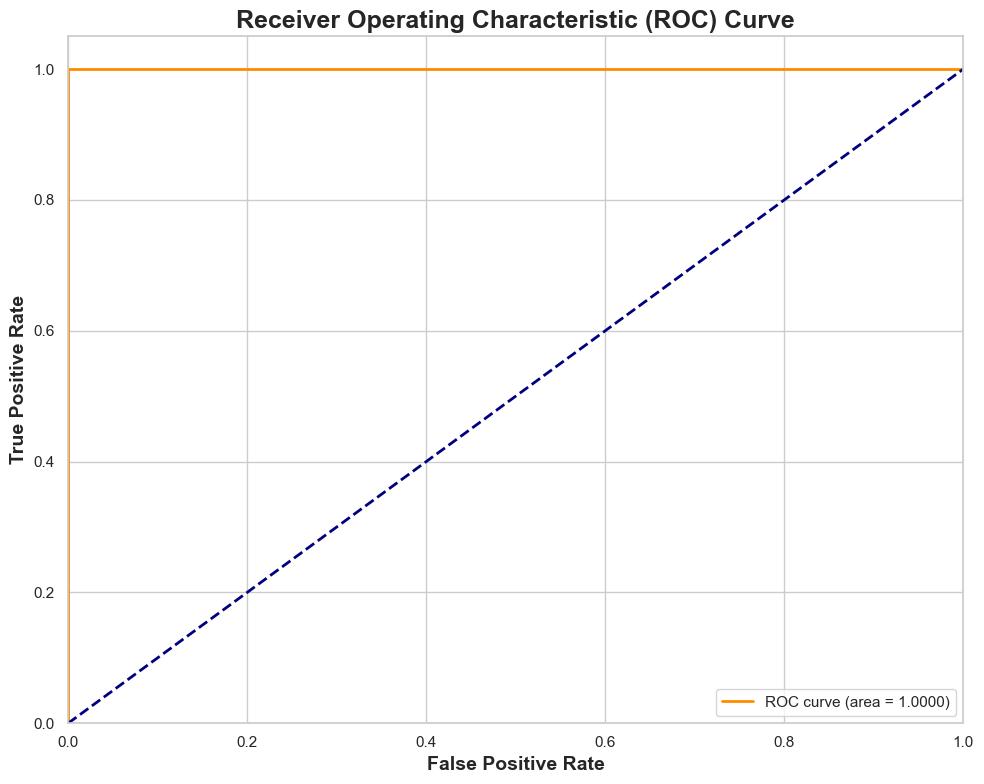

In [77]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## RandomForest_model

In [78]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [79]:
best_params, best_score, best_estimator = grid_search_classifier('RandomForest', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'max_depth': None, 'n_estimators': 300}
best_params = 0.9988967172910155


In [80]:
RandomForest_model = best_estimator
RandomForest_model

RandomForestClassifier(n_estimators=300, n_jobs=-1)

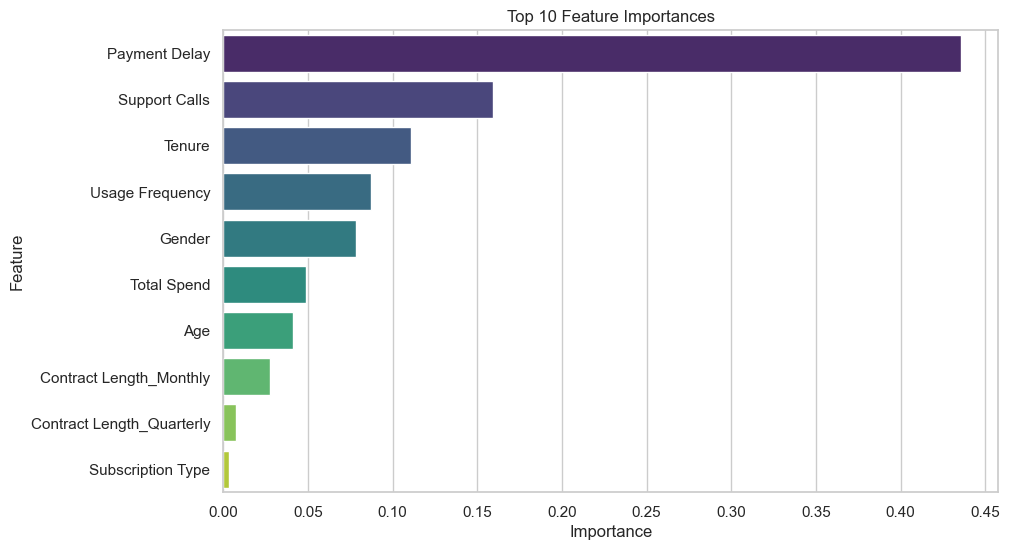

In [81]:
plot_feature_importance(RandomForest_model, x_train, selected_columns)

### Check Overfitting

Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 0.9995

Precision:
Training Precision: 1.0000
Validation Precision: 0.9995

Recall:
Training Recall: 1.0000
Validation Recall: 0.9995

F1-Score:
Training F1-Score: 1.0000
Validation F1-Score: 0.9995

MCC:
Training MCC: 1.0000
Validation MCC: 0.9990

Balanced Accuracy:
Training Balanced Accuracy: 1.0000
Validation Balanced Accuracy: 0.9995

Confusion Matrix:
Validation Confusion Matrix:
[[3300    3]
 [   0 2877]]

Cross-Validation(CV):
Cross-Validation Scores: [0.99961165 0.99953398 0.99937864 0.99937864 0.99922324]
Cross-Validation Mean Score: 0.9994


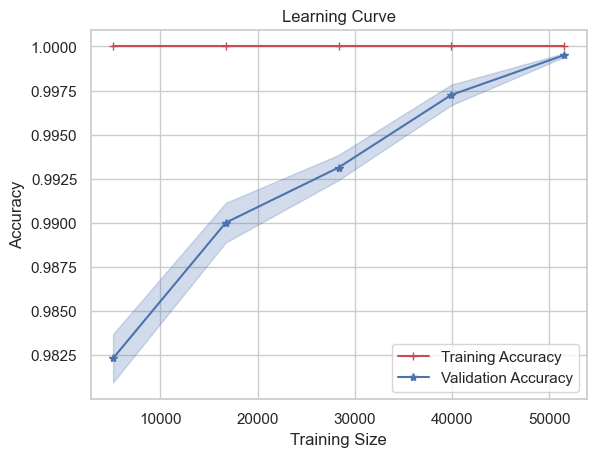

ROC AUC: 1.0000


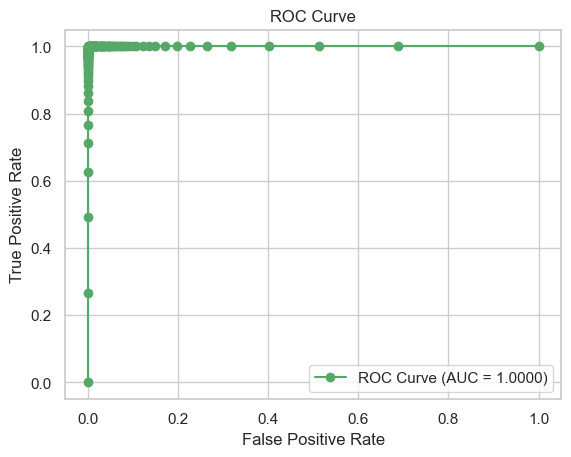

In [83]:
Check_Overfitting_Classification(RandomForest_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [84]:
y_pred = RandomForest_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

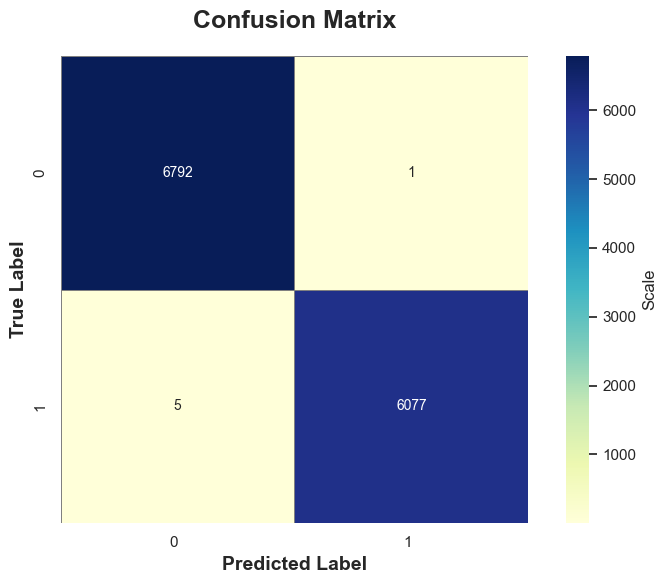

In [85]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.9995
Recall score = 0.9992
Precision score = 0.9998
F1 score = 0.9995
ROC AUC score = 0.9995


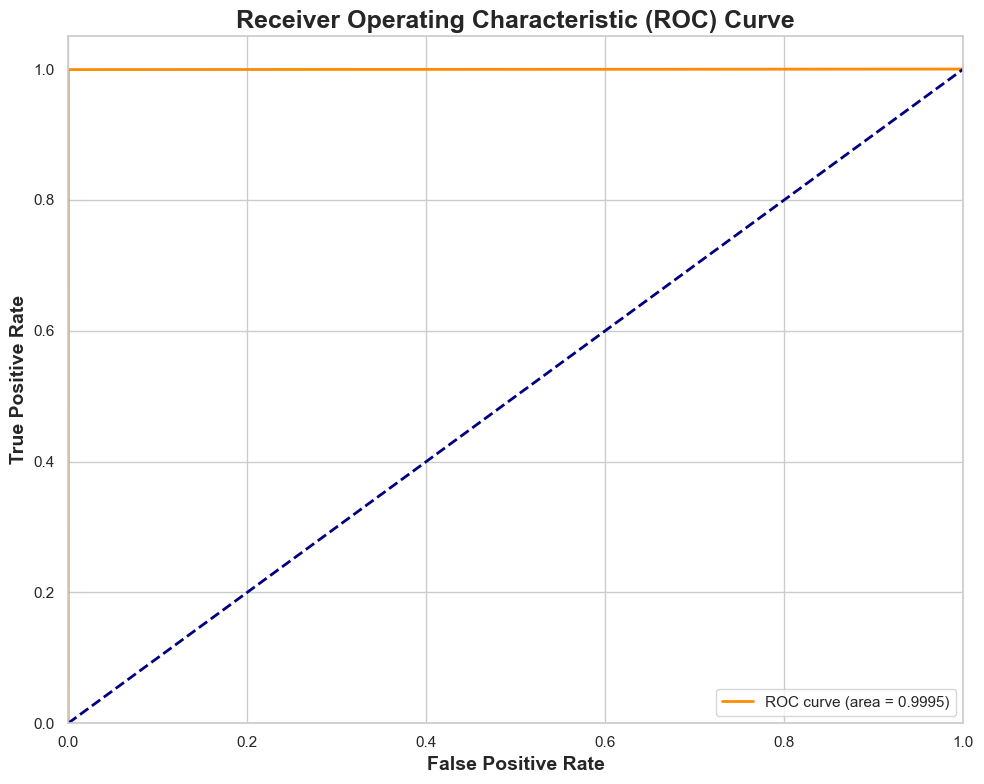

In [86]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## SVM_model

In [87]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [88]:
best_params, best_score, best_estimator = grid_search_classifier('SVM', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'C': 100, 'kernel': 'rbf'}
best_params = 0.963238362647113


In [89]:
SVM_model = best_estimator
SVM_model

SVC(C=100)

In [90]:
plot_feature_importance(SVM_model, x_train, selected_columns, top_n='first')

Model does not have feature importances or coefficients.


In [91]:
plot_feature_importance(SVM_model, x_train, selected_columns, top_n='last')

Model does not have feature importances or coefficients.


### Check Overfitting

Accuracy:
Training Accuracy: 0.9836
Validation Accuracy: 0.9681

Precision:
Training Precision: 0.9837
Validation Precision: 0.9683

Recall:
Training Recall: 0.9836
Validation Recall: 0.9681

F1-Score:
Training F1-Score: 0.9837
Validation F1-Score: 0.9681

MCC:
Training MCC: 0.9673
Validation MCC: 0.9361

Balanced Accuracy:
Training Balanced Accuracy: 0.9838
Validation Balanced Accuracy: 0.9685

Confusion Matrix:
Validation Confusion Matrix:
[[3182  121]
 [  76 2801]]

Cross-Validation(CV):
Cross-Validation Scores: [0.85165049 0.84217476 0.83852427 0.84147573 0.84690073]
Cross-Validation Mean Score: 0.8441


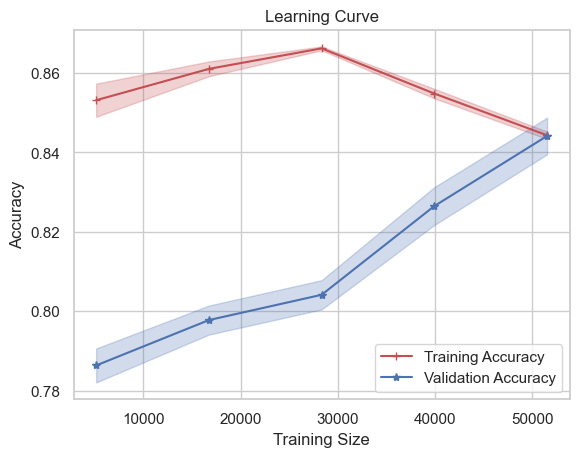

ROC AUC: Not available for this model


In [92]:
Check_Overfitting_Classification(SVM_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [93]:
y_pred = SVM_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

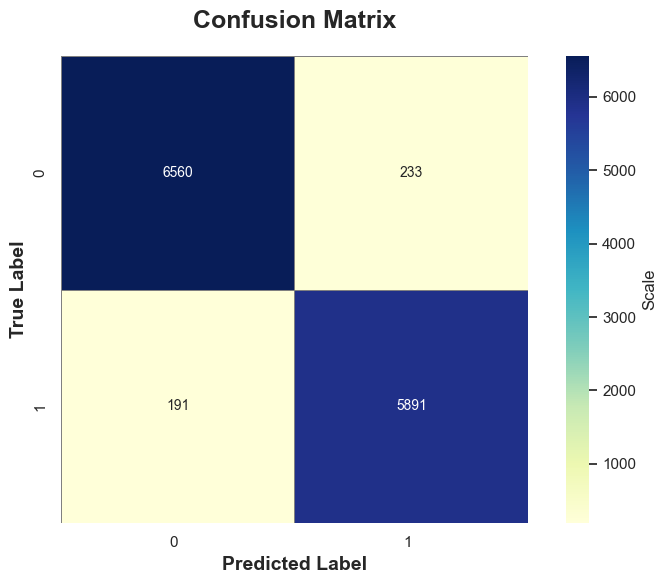

In [94]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.9671
Recall score = 0.9686
Precision score = 0.9620
F1 score = 0.9653
ROC AUC score = 0.9671


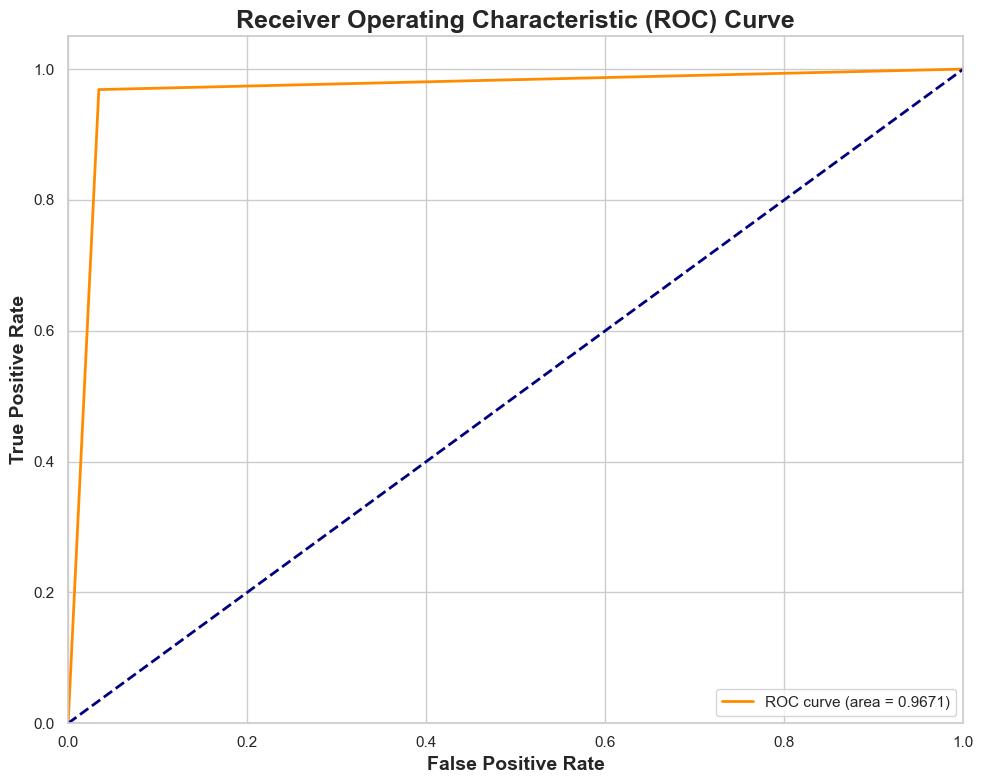

In [95]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## Stacking_model

In [96]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [97]:
xgboost = XGBClassifier(gamma= 0, learning_rate= 0.2, max_depth= 5, min_child_weight= 5, n_estimators= 100)
random_forest = RandomForestClassifier(max_depth=None, n_estimators=300, n_jobs=-1)
svc = SVC(C=100, kernel='rbf')

final_estimator= LogisticRegression()

voting_classifier =[('xgb', xgboost),('rf', random_forest),('svc', svc)]

Stacking_model = StackingClassifier(estimators=voting_classifier, cv=type_cross_valid, final_estimator=LogisticRegression())
Stacking_model.fit(x_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              grow_policy=None,
                                              im...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf',
                                RandomForestClassifier(n_estimators=300,
                                                       n_jobs=-1)),
                               ('svc', SVC(C=100))],
                   final_estimator=LogisticRegression())

In [98]:
plot_feature_importance(Stacking_model, x_train, selected_columns, top_n='first')

Model does not have feature importances or coefficients.


In [99]:
plot_feature_importance(Stacking_model, x_train, selected_columns, top_n='last')

Model does not have feature importances or coefficients.


### Check Overfitting

Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 0.9998

Precision:
Training Precision: 1.0000
Validation Precision: 0.9998

Recall:
Training Recall: 1.0000
Validation Recall: 0.9998

F1-Score:
Training F1-Score: 1.0000
Validation F1-Score: 0.9998

MCC:
Training MCC: 1.0000
Validation MCC: 0.9997

Balanced Accuracy:
Training Balanced Accuracy: 1.0000
Validation Balanced Accuracy: 0.9998

Confusion Matrix:
Validation Confusion Matrix:
[[3302    1]
 [   0 2877]]

Cross-Validation(CV):
Cross-Validation Scores: [1.         1.         0.99976699 1.         0.99984465]
Cross-Validation Mean Score: 0.9999


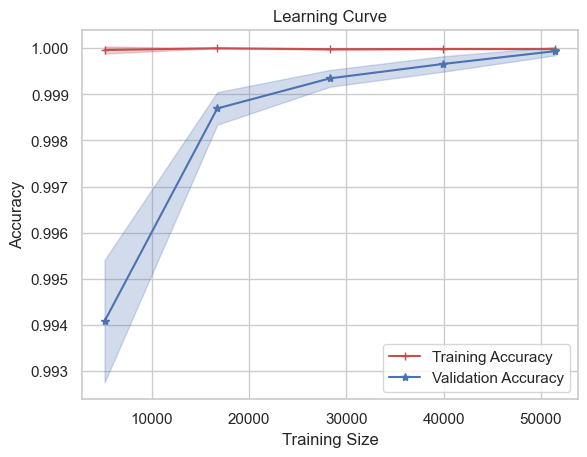

ROC AUC: 1.0000


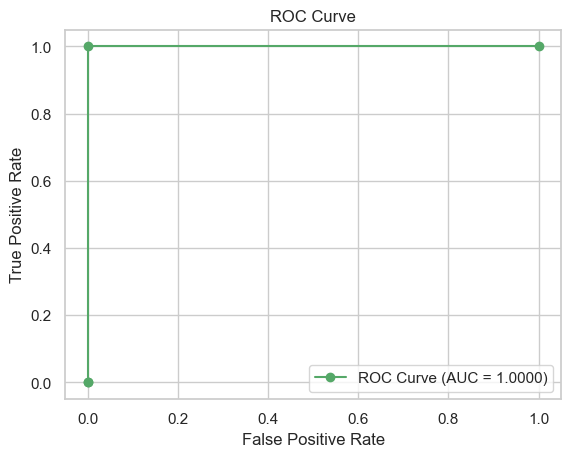

In [100]:
Check_Overfitting_Classification(Stacking_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [101]:
y_pred = Stacking_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

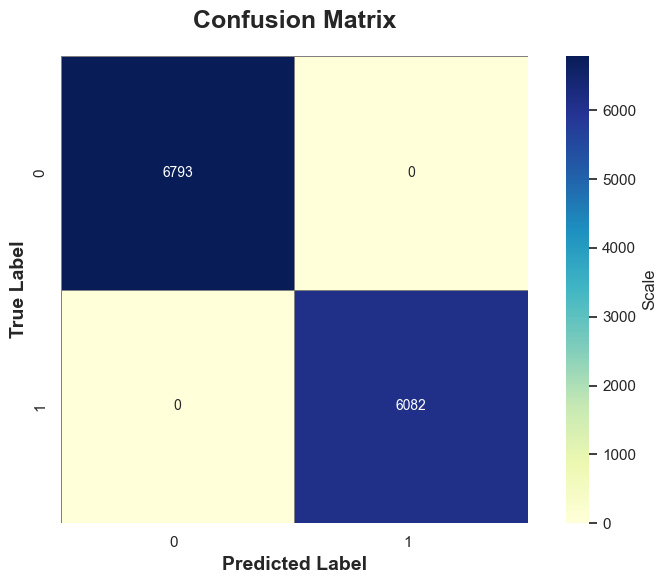

In [102]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 1.0000
Recall score = 1.0000
Precision score = 1.0000
F1 score = 1.0000
ROC AUC score = 1.0000


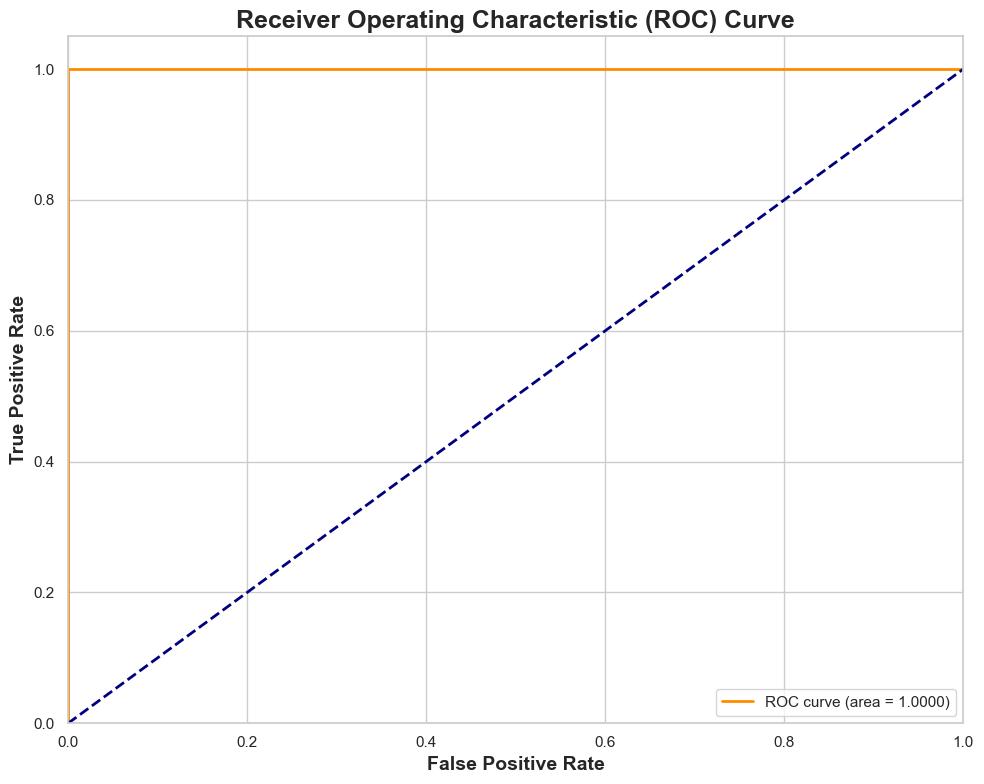

In [103]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

# compare between the models

In [104]:
models_names
models_values
evaluate_names = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

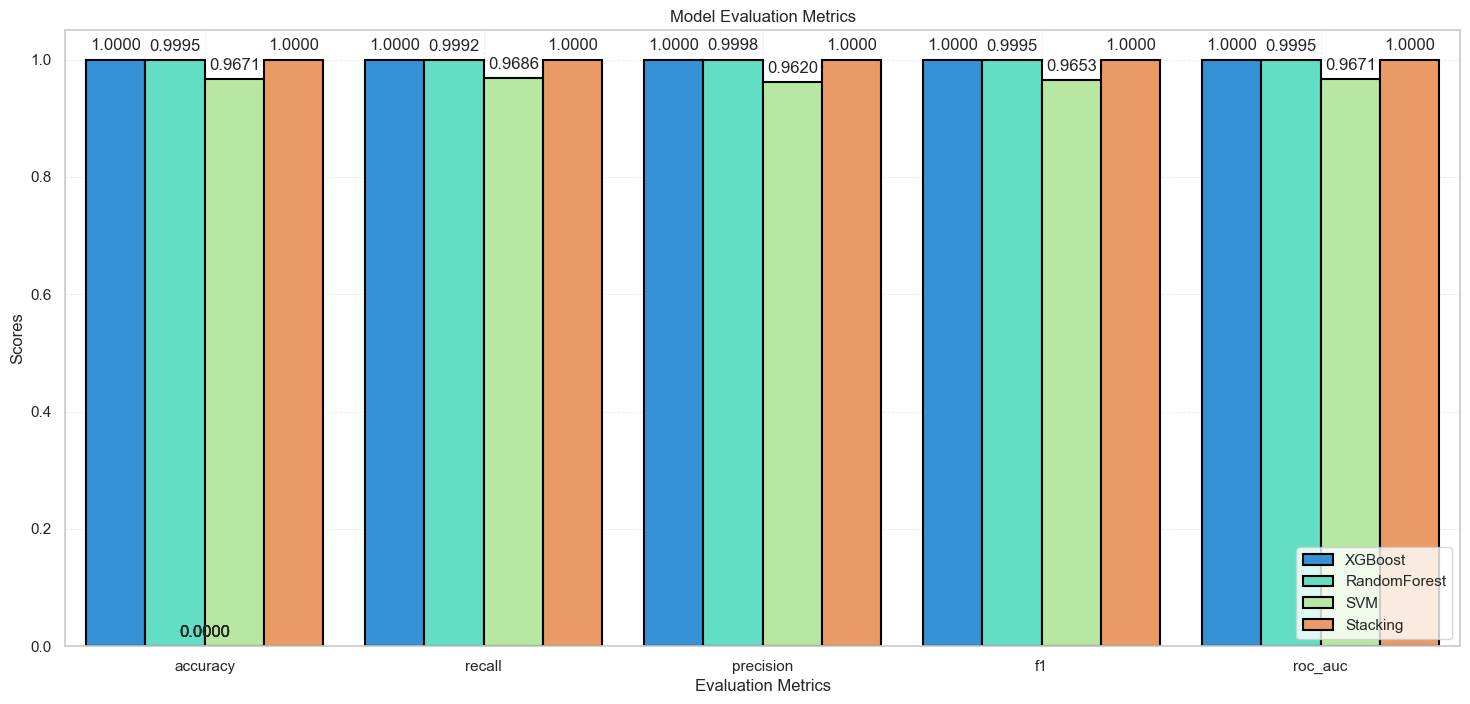

In [105]:
multiple_bar_plots_seaborn(
    data=models_values, 
    labels=models_names, 
    categories=evaluate_names, 
    palette='rainbow',
    title='Model Evaluation Metrics',
    xlabel='Evaluation Metrics',
    ylabel='Scores',
    figsize=(18, 8),
    width=0.85,
    hatch = False,
    annote_num = 4
)